<a href="https://colab.research.google.com/github/Mparate1234/Py_stat_DS_ML/blob/main/dim-reduction%2C%20PCA%20%26%20LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                   technique for dimensionanity reduction 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
digit=load_digits()

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame(digit.data)
df.shape          ## data has 1797 rows and 64 columns

(1797, 64)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


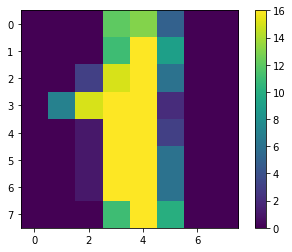

In [5]:
plt.imshow(digit.data[1].reshape(8,8))          ## these are pixels shown in image 
plt.colorbar()                               ## use for pitcher perception
plt.show()                                   ### its a image of 1

In [6]:
digit.data[7].reshape(8,8)

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

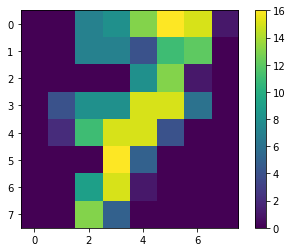

In [7]:
plt.imshow(digit.data[7].reshape(8,8))                     ## this is image of 7
plt.colorbar()                                         
plt.show()                                     ## image having 16 shades of colours 

In [8]:
digit.data[2]        #  64 column array - this is how 2 is stored as data

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [9]:
y=digit.target
y.shape


(1797,)

In [10]:
df.max().max()

16.0

In [11]:
df.min().min()

0.0

In [12]:
# bringing to the scale to 0 ot 1
x_transformed=digit.data/16.0
x_transformed.shape

(1797, 64)

In [13]:
x_transformed.max().max()

1.0

In [14]:
x_transformed.min().min()

0.0

In [15]:
type(x_transformed)

numpy.ndarray

#  * problem is 64 columns are way too much heavy 
# * this is why we are using PCA method for data reduction

# __________ PCA --- principle component analysis

In [16]:
from sklearn.decomposition import PCA
pca=PCA()

In [17]:
digit_pca=pca.fit_transform(x_transformed)
digit_pca.shape

(1797, 64)

In [18]:
digit_pca[2]

array([ 4.36995185e-01, -6.22249150e-01,  1.84909880e-01, -7.68018902e-01,
       -1.13287646e+00, -2.81728983e-01,  1.15195153e-01, -1.02594999e+00,
        4.49520563e-02,  2.65987842e-01, -7.70858992e-02, -2.39869494e-02,
        1.30553031e-02,  4.27565002e-01, -1.04980656e-01, -2.67250191e-01,
        4.20530305e-01,  7.93654944e-02,  1.15487407e-02,  5.45692240e-01,
        3.09444667e-01, -1.54069330e-01,  3.74961750e-01,  6.60795560e-03,
       -1.91416910e-01,  1.03778537e-02,  2.64301321e-01,  1.34853581e-01,
        5.23723622e-02, -3.38908789e-02,  2.71751667e-01,  2.81528267e-02,
        2.13177952e-02, -3.16010521e-02, -1.75515328e-01, -7.83669924e-02,
       -1.37855001e-02,  2.38760937e-03,  6.92907228e-02,  2.05323924e-01,
        9.06276753e-02,  5.01427861e-02, -7.49174019e-02,  1.02470370e-01,
        1.03437462e-01,  7.56715106e-02, -1.36641485e-01,  5.54964333e-02,
        1.74190464e-02, -5.63528705e-03,  1.54600159e-02, -5.89591257e-03,
       -4.71432727e-03,  

In [19]:
x_transformed[2]

array([0.    , 0.    , 0.    , 0.25  , 0.9375, 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.1875, 1.    , 0.9375, 0.875 , 0.    , 0.    ,
       0.    , 0.    , 0.5   , 0.8125, 0.5   , 1.    , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 0.375 , 0.9375, 0.6875, 0.    , 0.    ,
       0.    , 0.0625, 0.5   , 0.8125, 0.9375, 0.0625, 0.    , 0.    ,
       0.    , 0.5625, 1.    , 1.    , 0.3125, 0.    , 0.    , 0.    ,
       0.    , 0.1875, 0.8125, 1.    , 1.    , 0.6875, 0.3125, 0.    ,
       0.    , 0.    , 0.    , 0.1875, 0.6875, 1.    , 0.5625, 0.    ])

In [20]:
np.round(pca.explained_variance_ratio_,2)

array([0.15, 0.14, 0.12, 0.08, 0.06, 0.05, 0.04, 0.04, 0.03, 0.03, 0.02,
       0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [21]:
np.sum(pca.explained_variance_ratio_)

1.0

In [22]:
pca=PCA(n_components=15)
digit_pca=pca.fit_transform(x_transformed)
digit_pca.shape

(1797, 15)

In [23]:
np.sum(pca.explained_variance_ratio_)

0.8352995270285871

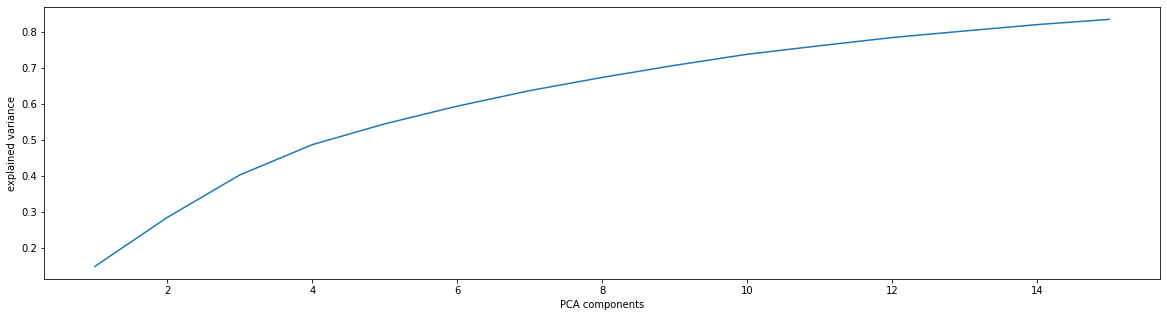

In [24]:
plt.figure(figsize=(20,5))
plt.plot(range(1,16),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('PCA components')
plt.ylabel('explained variance')
plt.show()

# LDA ---- linear discriminant analysis

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()

In [26]:
x_transformed.shape

(1797, 64)

In [27]:
y=digit.target

In [28]:
len(set(y))

10

In [29]:
lda_components=lda.fit_transform(x_transformed,y)
lda_components.shape

(1797, 9)

In [30]:
lda.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

In [31]:
np.sum(lda.explained_variance_ratio_)

1.0